In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib as mpl

In [2]:
plt.figure()
import mplhep
mplhep.style.use("CMS")


<Figure size 432x288 with 0 Axes>

In [3]:
scanDirs=os.listdir("phaseScans/board_10/voltage_1_20")
df=pd.DataFrame({'Timestamp':scanDirs})
df['Date']=df['Timestamp'].apply(lambda x: pd.to_datetime(x,format="%d%b_%H%M%S").replace(year=2022))

df=df.loc[df.Date>'2022-09-26 12']
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)

In [4]:
def getPhase(fName):
    try:
        x=np.loadtxt(fName,delimiter=',',dtype=int) 
    except: 
        x=np.ones(15*12,dtype=int).reshape(15,12)*999
    return x
        
for capSel in [25,26,27,28,29,30,31]:
    df[f'phaseScan_1p20V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_20/{x}/eRx_PhaseScan_CapSelect_{capSel}.csv'))
    df[f'phaseScan_1p08V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_08/{x}/eRx_PhaseScan_CapSelect_{capSel}.csv'))
    df[f'phaseScan_1p32V_CapSel{capSel}']=df['Timestamp'].apply(lambda x: getPhase(f'phaseScans/board_10/voltage_1_32/{x}/eRx_PhaseScan_CapSelect_{capSel}.csv'))

In [5]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

def get_max_width(err_counts):
    max_width_by_ch = []
    second_max_width_by_ch = []
    err_wrapped=np.concatenate([err_counts,err_counts[:4]])
    for ch in range(12):
        x = err_wrapped[:,ch]
        phases = consecutive(np.argwhere(x<=1).flatten())
        sizes = [np.size(a) for a in phases]
        max_width = max(sizes)
        sizes.remove(max_width)
        try:
            second_max_width = max(sizes)
        except:
            second_max_width = 0
        max_width_by_ch.append(max_width)
        second_max_width_by_ch.append(second_max_width)
    return np.array([max_width_by_ch,second_max_width_by_ch])

def get_best_setting(err_counts):
    best_setting_by_ch = []
    counts_window = []
    for i in range(15):
        counts_window.append( err_counts[i] + err_counts[(i-1)%15] + err_counts[(i+1)%15])
    counts_window = np.array(counts_window)
    counts_window[ err_counts>0 ] += 255*3
    y = (err_counts[2:-2]+err_counts[1:-3]+err_counts[3:-1]+err_counts[4:] + err_counts[:-4])
    y[ err_counts[2:-2]>0 ] += 2555
    best_setting = y.argmin(axis=0)+2
    return best_setting


In [6]:
df_bestPhase=pd.DataFrame(index=df.index)
for c in df.columns[1:]:
    df_bestPhase[c]=df[c].apply(get_best_setting)
    x=df[c].apply(get_max_width).values
    df_bestPhase[c+"_width"]=[i[0] for i in x]
    df_bestPhase[c+"_width2"]=[i[1] for i in x]


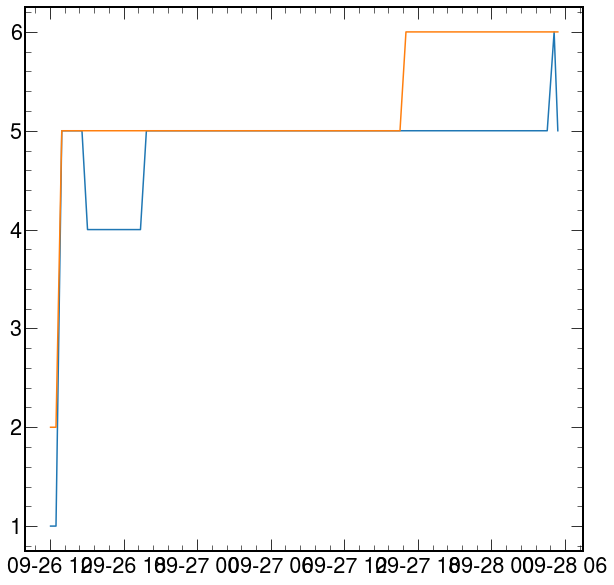

In [7]:
x=np.array(list(df_bestPhase.phaseScan_1p20V_CapSel30.values))
plt.plot(df_bestPhase.index.values,x[:,0]%7)
plt.plot(df_bestPhase.index.values,x[:,11]%7)

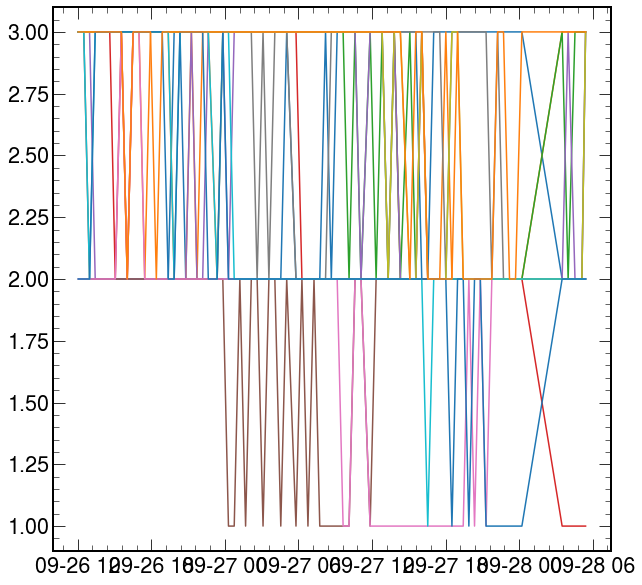

In [8]:
x=np.array(list(df_bestPhase.phaseScan_1p20V_CapSel28_width2.values))
plt.plot(df_bestPhase.index.values,x)
# plt.plot(df_bestPhase.index.values,x[:,11]%7)

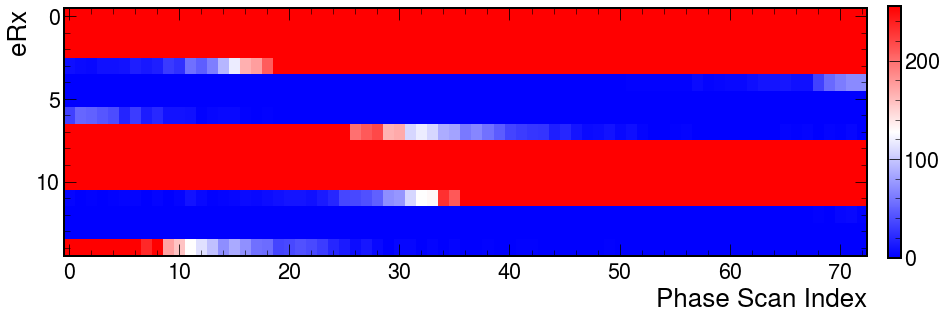

In [9]:
x=np.array(list(df.loc['2022-09-26 14:45':].phaseScan_1p20V_CapSel27.values))

fig=plt.figure(figsize=(15,8))
im=plt.imshow(x[:,:,0].T,cmap=mpl.colormaps['bwr'],aspect=1.5)
plt.xlabel('Phase Scan Index')
plt.ylabel('eRx')
plt.colorbar(fraction=0.015, pad=.025);


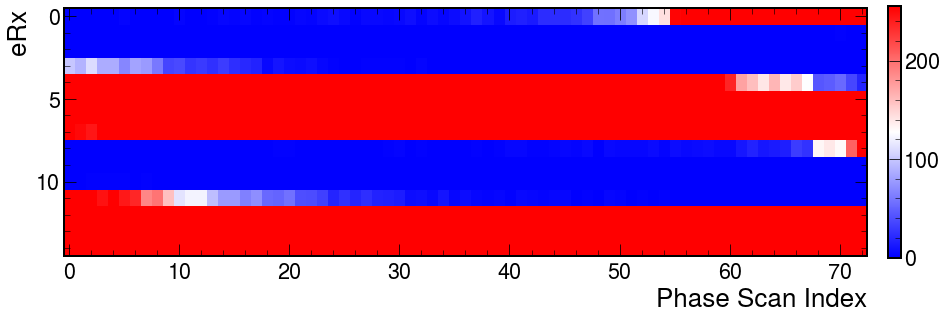

In [10]:
x=np.array(list(df.loc['2022-09-26 14:45':].phaseScan_1p32V_CapSel27.values))

fig=plt.figure(figsize=(15,8))
im=plt.imshow(x[:,:,0].T,cmap=mpl.colormaps['bwr'],aspect=1.5)
plt.xlabel('Phase Scan Index')
plt.ylabel('eRx')
plt.colorbar(fraction=0.015, pad=.025);


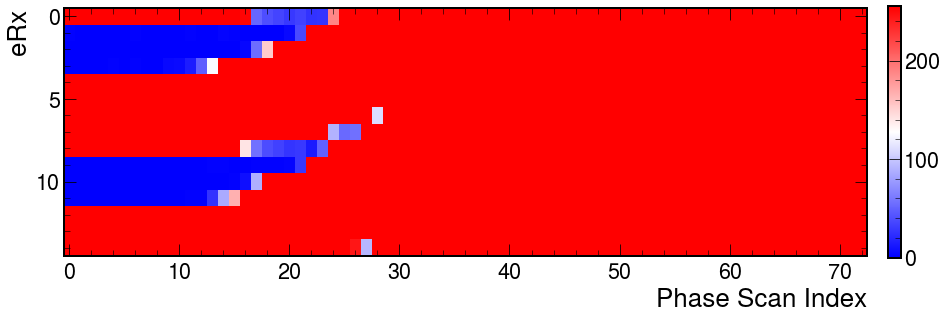

In [11]:
x=np.array(list(df.loc['2022-09-26 14:45':].phaseScan_1p08V_CapSel27.values))

fig=plt.figure(figsize=(15,8))
im=plt.imshow(x[:,:,0].T,cmap=mpl.colormaps['bwr'],aspect=1.5)
plt.xlabel('Phase Scan Index')
plt.ylabel('eRx')
plt.colorbar(fraction=0.015, pad=.025);


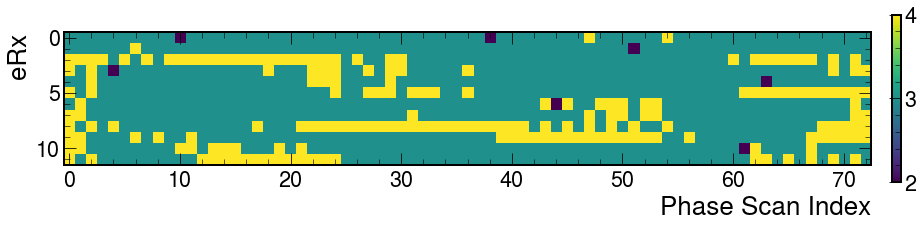

In [12]:
x=np.array(list(df_bestPhase.loc['2022-09-26 14:45':].phaseScan_1p20V_CapSel31_width.values))

fig=plt.figure(figsize=(15,5))
im=plt.imshow(x.T)
plt.xlabel('Phase Scan Index')
plt.ylabel('eRx')
plt.colorbar(fraction=0.01, pad=.025);


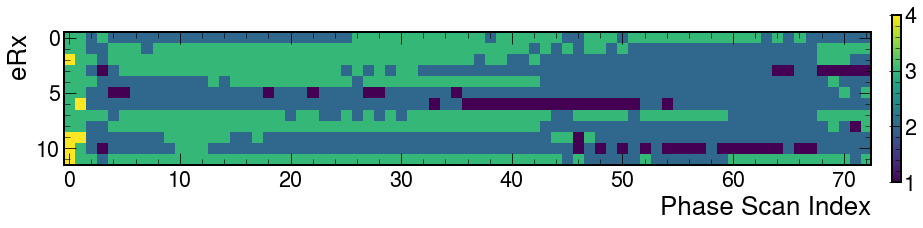

In [13]:
x=np.array(list(df_bestPhase.loc['2022-09-26 14:45':].phaseScan_1p20V_CapSel31_width2.values))

fig=plt.figure(figsize=(15,5))
im=plt.imshow(x.T)
plt.xlabel('Phase Scan Index')
plt.ylabel('eRx')
plt.colorbar(fraction=0.01, pad=.025);
